Connected to myenv (Python 3.12.8)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Create folder for images
os.makedirs("figures", exist_ok=True)

data_path = "../data/processed/"
long = pd.read_csv(f"{data_path}long12_clean.csv")

In [3]:
# ============================================
# Drive Dataset Correlation Heatmap
# ============================================
# Check all columns
print(long.columns.tolist())

features = long.columns.tolist()
print("Features for correlation heatmap:", features)

print("\n" + "="*50)
print("CORRELATION WITH FEATURES")
print("="*50)
corr = long[features].corr()
print(corr)

['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_commanded_equiv_ratio', 'absolute_barometric_pressure', 'relative_throttle_position', 'intake_air_temp', 'timing_advance', 'catalyst_temperature_bank1_sensor1', 'catalyst_temperature_bank1_sensor2', 'control_module_voltage', 'commanded_evaporative_purge', 'time_run_with_mil_on', 'time_since_trouble_codes_cleared', 'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared']
Features for correlation heatmap: ['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_command

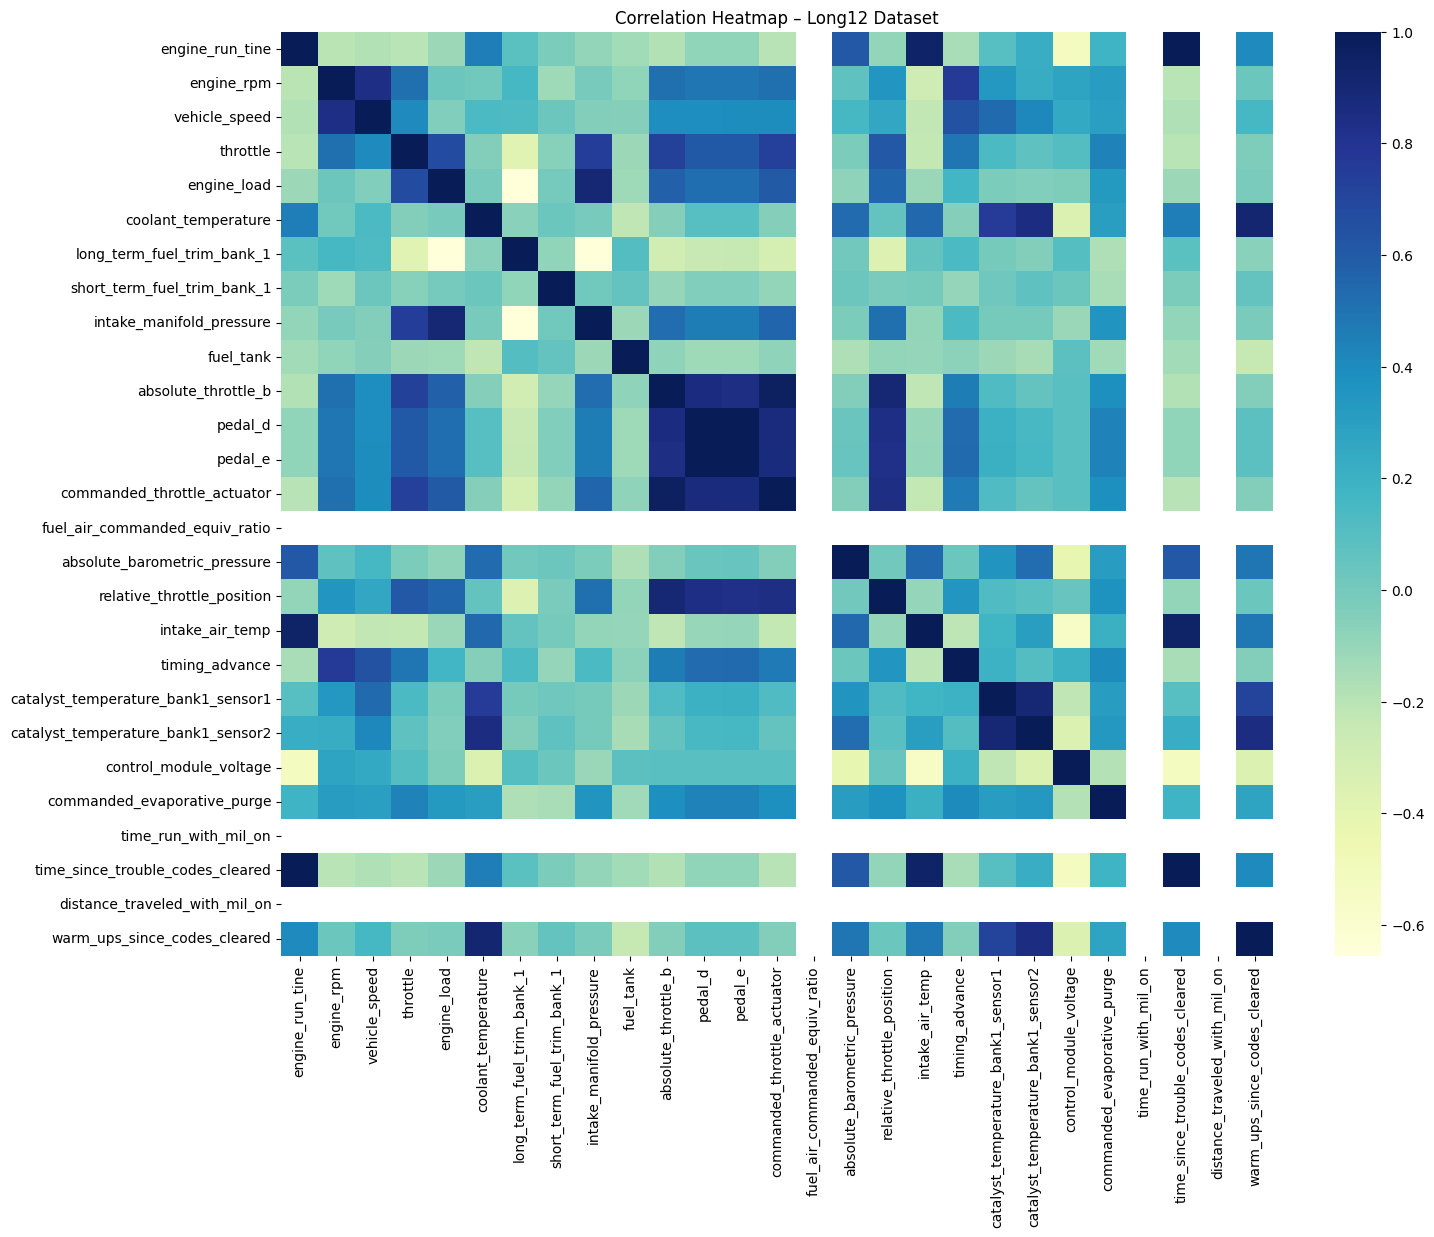

In [4]:
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(long[features].corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap – Long12 Dataset")
plt.savefig("figures/long12_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
print("\nNaN values per column in correlation matrix:")
print(corr[features].isna().sum())

# Identify columns to drop
columns_to_drop_long = [
    'fuel_air_commanded_equiv_ratio', 
    'time_run_with_mil_on',
    'distance_traveled_with_mil_on'
]


NaN values per column in correlation matrix:
engine_run_tine                        3
engine_rpm                             3
vehicle_speed                          3
throttle                               3
engine_load                            3
coolant_temperature                    3
long_term_fuel_trim_bank_1             3
short_term_fuel_trim_bank_1            3
intake_manifold_pressure               3
fuel_tank                              3
absolute_throttle_b                    3
pedal_d                                3
pedal_e                                3
commanded_throttle_actuator            3
fuel_air_commanded_equiv_ratio        27
absolute_barometric_pressure           3
relative_throttle_position             3
intake_air_temp                        3
timing_advance                         3
catalyst_temperature_bank1_sensor1     3
catalyst_temperature_bank1_sensor2     3
control_module_voltage                 3
commanded_evaporative_purge            3
time_run_wi

In [6]:
# Remove them from feature list
features_clean_long = [f for f in features if f not in columns_to_drop_long]

# Recompute correlation
corr_long_clean = long[features_clean_long].corr()

print("\nCleaned correlation matrix for long:")
print(corr_long_clean)


Cleaned correlation matrix for long:
                                    engine_run_tine  engine_rpm  \
engine_run_tine                            1.000000   -0.202755   
engine_rpm                                -0.202755    1.000000   
vehicle_speed                             -0.177131    0.843954   
throttle                                  -0.198415    0.508687   
engine_load                               -0.113529    0.027879   
coolant_temperature                        0.454798    0.011149   
long_term_fuel_trim_bank_1                 0.083743    0.153365   
short_term_fuel_trim_bank_1               -0.025713   -0.121686   
intake_manifold_pressure                  -0.091698   -0.015108   
fuel_tank                                 -0.134968   -0.082914   
absolute_throttle_b                       -0.180766    0.509047   
pedal_d                                   -0.084313    0.482956   
pedal_e                                   -0.081231    0.488820   
commanded_throttle_actua

In [7]:
##not necessary the copy but keeping for consistency
corr_matrix_long = corr_long_clean.copy()

# Get upper triangle of the correlation matrix
upper_tri_long = corr_matrix_long.where(
    np.triu(np.ones(corr_matrix_long.shape), k=1).astype(bool)
)

strongest_pos_long = upper_tri_long.stack().sort_values(ascending=False)
print("\n" + "="*50)
print("Strongest positive correlations (LONG):")
print("="*50)
print(strongest_pos_long.head(10))

strongest_neg_long = upper_tri_long.stack().sort_values(ascending=True)
print("\n" + "="*50)
print("Strongest negative correlations (LONG):")
print("="*50)
print(strongest_neg_long.head(10))


Strongest positive correlations (LONG):
engine_run_tine                     time_since_trouble_codes_cleared      0.999764
pedal_d                             pedal_e                               0.994343
absolute_throttle_b                 commanded_throttle_actuator           0.963963
engine_run_tine                     intake_air_temp                       0.943792
intake_air_temp                     time_since_trouble_codes_cleared      0.943422
coolant_temperature                 warm_ups_since_codes_cleared          0.921513
engine_load                         intake_manifold_pressure              0.902368
absolute_throttle_b                 relative_throttle_position            0.899004
catalyst_temperature_bank1_sensor1  catalyst_temperature_bank1_sensor2    0.898416
pedal_e                             commanded_throttle_actuator           0.871653
dtype: float64

Strongest negative correlations (LONG):
long_term_fuel_trim_bank_1          intake_manifold_pressure           -0

In [8]:
# ===========================================
# Scatter plots for strongest correlations
# ===========================================

os.makedirs("figures/long12_scatter/positive", exist_ok=True)
os.makedirs("figures/long12_scatter/negative", exist_ok=True)


Creating scatter plots for top 5 positive correlations...


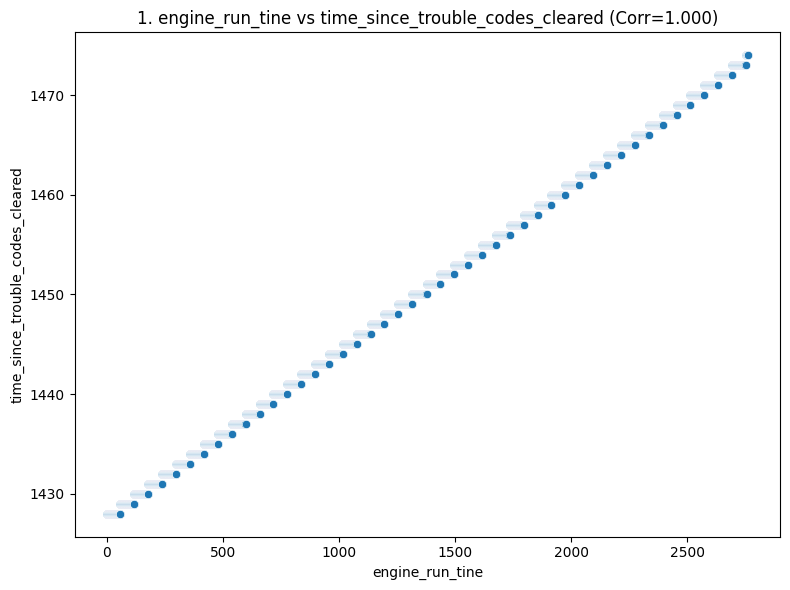

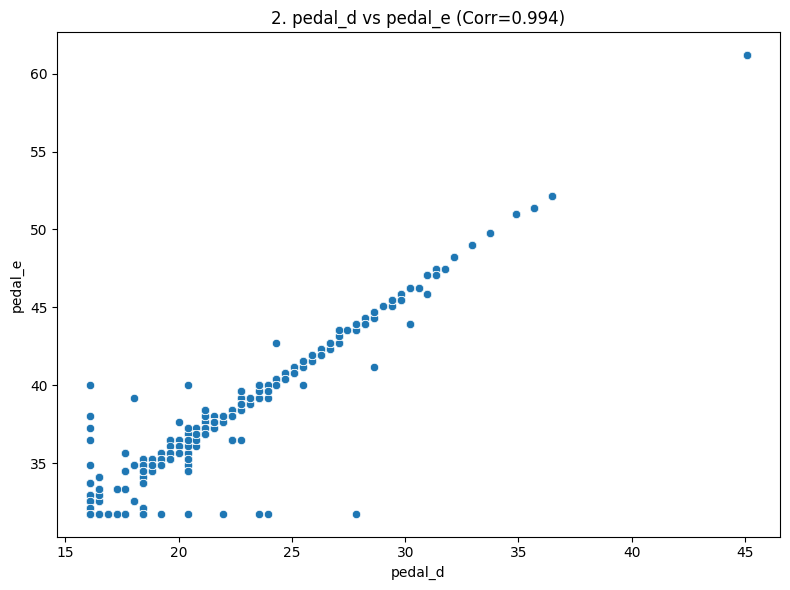

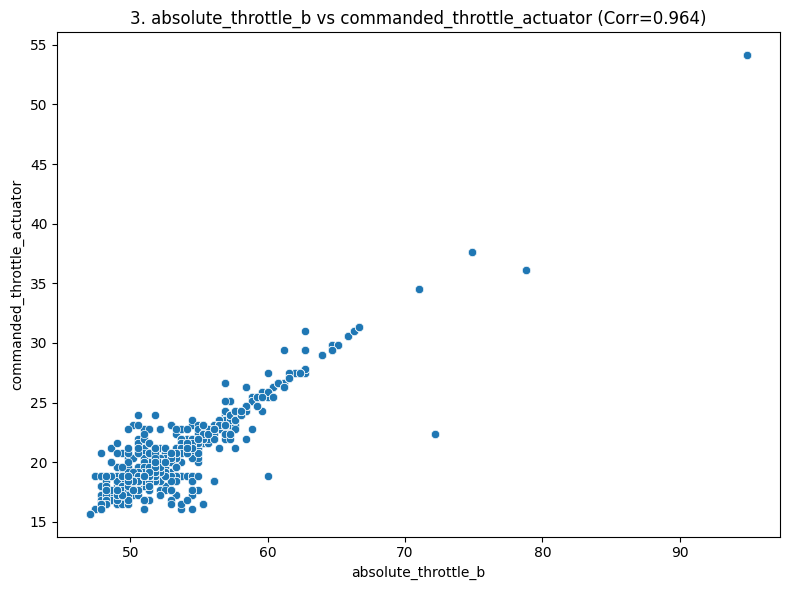

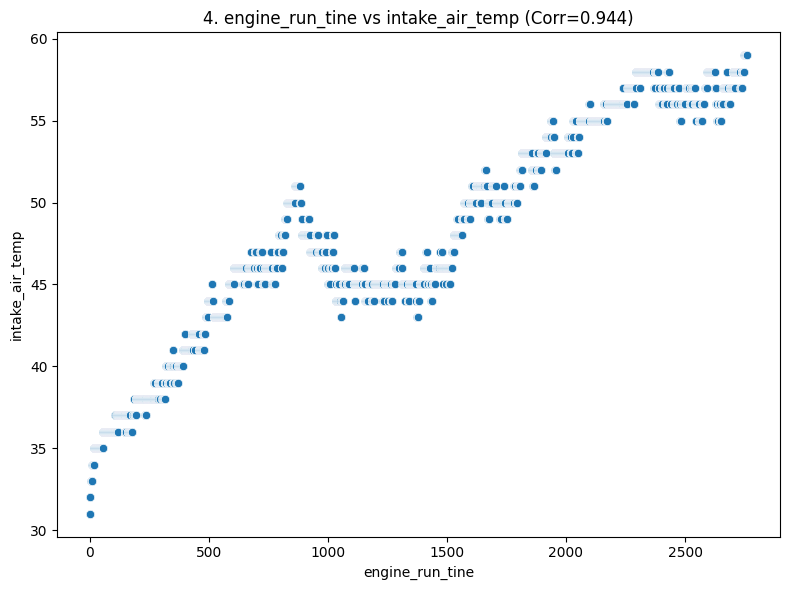

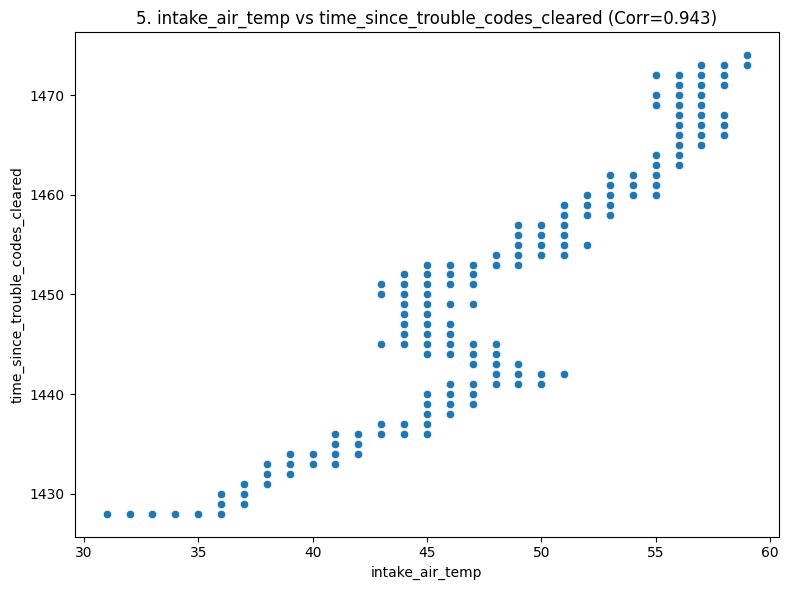

In [9]:
# Top 5 positive correlations
top5_pos = strongest_pos_long.head(5)
print("\nCreating scatter plots for top 5 positive correlations...")
for i, ((col1, col2), value) in enumerate(top5_pos.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=long, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/long12_scatter/positive/scatter_pos{i}_{col1}_{col2}.png", dpi=300)
    plt.show()

Creating scatter plots for top 5 negative correlations...


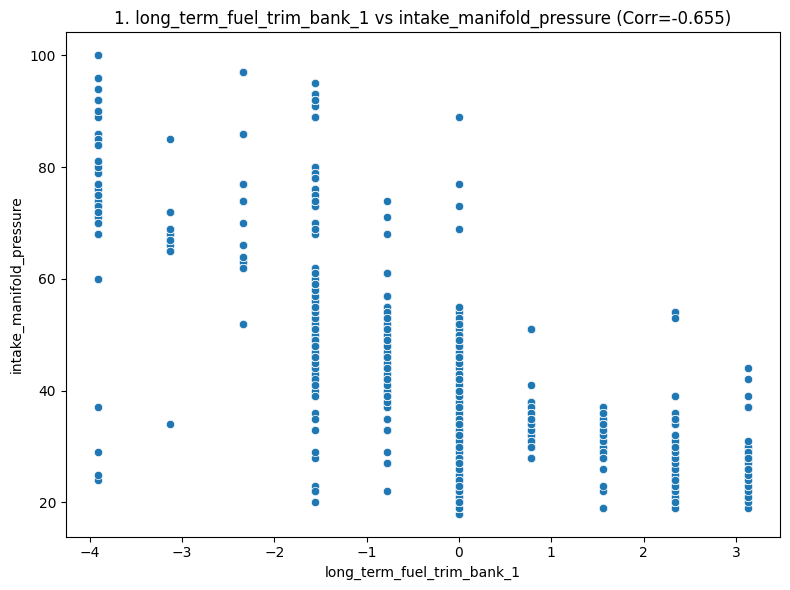

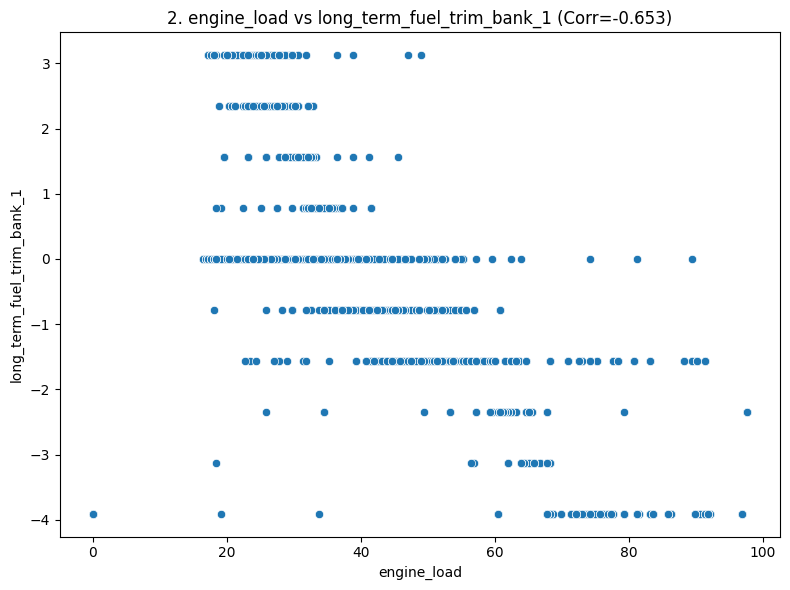

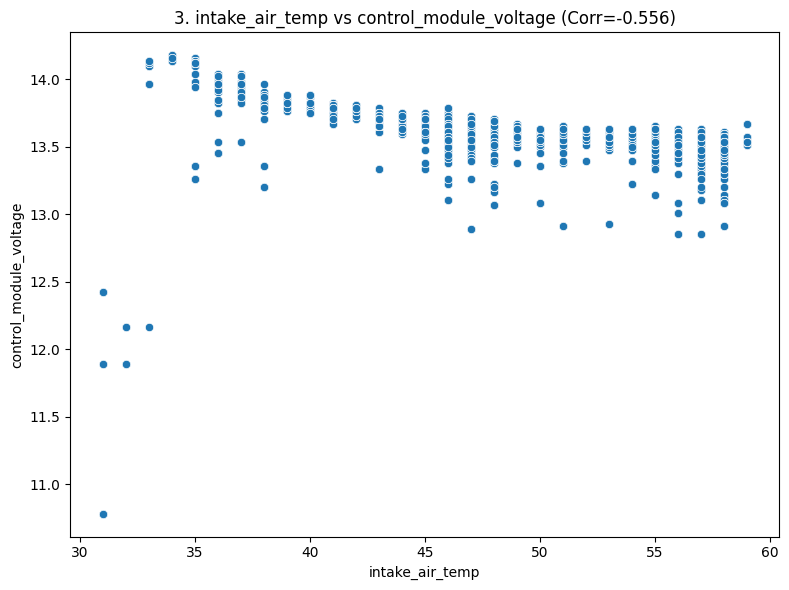

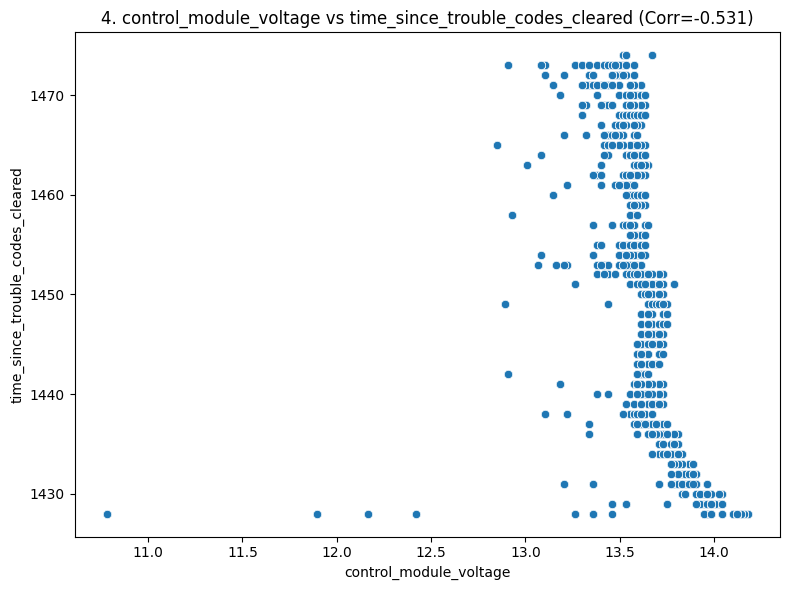

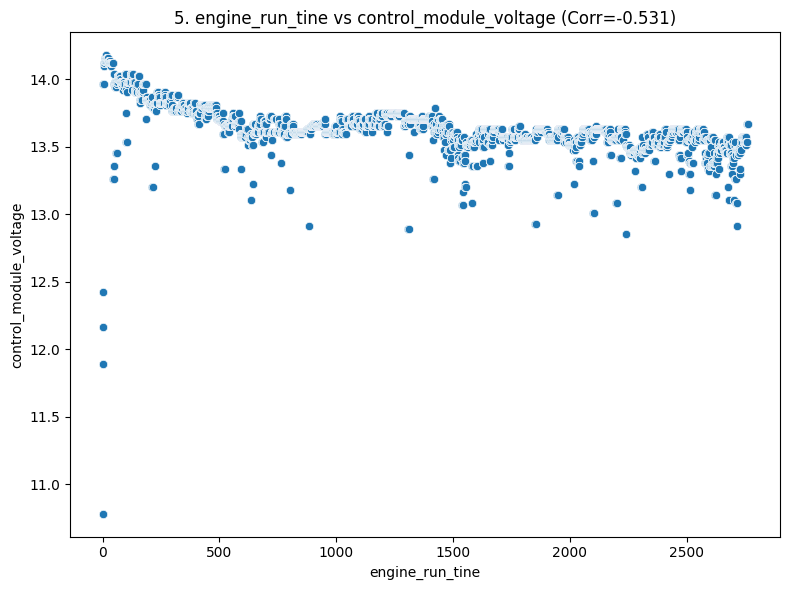

In [10]:
# Top 5 negative correlations
top5_neg = strongest_neg_long.head(5)
print("Creating scatter plots for top 5 negative correlations...")
for i, ((col1, col2), value) in enumerate(top5_neg.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=long, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/long12_scatter/negative/scatter_neg{i}_{col1}_{col2}.png", dpi=300)
    plt.show()